<h1>2015 US Flights Analysis</h1>

By Vu Anh Quan Nguyen

<h1>Dataset Description</h1>

The dataset for my project comes from https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv.

This data was gathered by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics, in which the on-time performance of domestic flights operated by large air carriers in 2015 was tracked.

In particular, for this analysis, departure delays and cancellations will be observed.

The dataset contains around 6 million rows of observation data. The following attributes are recorded in each row.

| Attribute | Description | Type |
| --------- | ----------- | ---- |
| YEAR | The year of the flight (all 2015) | Integer |
| MONTH | The month of the flight | Integer |
| DAY | The day of the flight | Integer |
| DAY_OF_WEEK | The day of the flight as Monday represents 1, Tuesday represents 2, etc. until Sunday represents 7 | Integer |
| AIRLINE | The airline identifier | String |
| FLIGHT_NUMBER | The flight identifier | Integer |
| TAIL_NUMBER | The aircraft identifier | Integer |
| ORIGIN_AIRPORT | The starting airport | String |
| DESTINATION_AIRPORT | The destination airport | String |
| SCHEDULED_DEPARTURE | The planned departure time | Integer |
| DEPARTURE_TIME | The actual departure time | Integer |
| DEPATURE_DELAY | The total delay on departure | Integer |
| TAXI_OUT | The time between departure from the origin airport gate and wheels off | Integer |
| WHEELS_OFF | The time that the aircraft's wheels leave the ground | Integer |
| SCHEDULED_TIME | Planned time amount needed for the flight trip | Integer |
| ELAPSED_TIME | AIR_TIME + TAXI_IN + TAXI_OUT | Integer |
| AIR_TIME | The time duration between WHEELS_OFF and WHEELS_ON time | Integer |
| DISTANCE | The distance between two airports | Integer |
| WHEELS_ON | The time point that the aircraft's wheels touch on the ground | Integer |
| TAXI_IN | The time duration elapsed between wheels-on and gate arrival at the destination airport | Integer |
| SCHEDULED_ARRIVAL | Planned arrival time | Integer |
| ARRIVAL_TIME | WHEELS_ON + TAXI_IN | Integer |
| ARRIVAL_DELAY | ARRIVAL_TIME - SCHEDULED_ARRIVAL | Integer |
| DIVERTED | Aircraft landed on airport that out of schedule | Boolean |
| CANCELLED | Flight Cancelled (1 = cancelled) | Boolean |
| CANCELLATION_REASON | Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security | Character |
| AIR_SYSTEM_DELAY | Delay caused by air system | Integer |
| SECURITY_DELAY | Delay caused by security | Integer |
| AIRLINE_DELAY | Delay caused by the airline | Integer |
| LATE_AIRCRAFT_DELAY | Delay caused by aircraft | Integer |
| WEATHER_DELAY | Delay caused by weather | Integer |

<h1>Import libraries</h1>

Firstly, we will import the necessary libraries for the analysis of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr 

<h1>Import main dataset</h1>

Next, we will import the flights dataset into a pandas frame, and print the first rows to make sure that the dataset has been read correctly.

In [2]:
#import flights dataset, and check that reading has been successful
flights = pd.read_csv('flights.csv', low_memory = False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Combine year, month, day entries into single date</h1>

In [3]:
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

<h1>Reformat departure time into one single entry</h1>




In [4]:
flights['SCHEDULED_DEPARTURE_HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100
flights['SCHEDULED_DEPARTURE_MINUTE'] = flights['SCHEDULED_DEPARTURE'] % 100
flights['SCHEDULED_DEPARTURE'] = pd.to_datetime(flights['SCHEDULED_DEPARTURE_HOUR'].astype(str) + ':' + flights['SCHEDULED_DEPARTURE_MINUTE'].astype(str), format='%H:%M')

<h1>Rename columns</h1>

In addition to the main flights dataset, I am also provided with extra datasets with airlines and airports details. For ease in conversion in these details, I will rename some columns in the flights dataset.

In [5]:
#rename columns
flights = flights.rename(columns = {'AIRLINE': 'IATA_CODE_AIRLINE', 'ORIGIN_AIRPORT': 'IATA_CODE_ORIGIN_AIRPORT', 'DESTINATION_AIRPORT': 'IATA_CODE_DESTINATION_AIRPORT', 'CANCELLATION_REASON': 'CANCELLATION_REASON_CODE'})

<h1>Import extra datasets and convert IATA codes into full names</h1>

Now we will import the airlines and airports datasets, and use them to convert the IATA codes of the airlines and airports in the flights dataset to their full names.

In [6]:
#import airlines details as a Pandas data frame
airlines = pd.read_csv('airlines.csv', low_memory = False)
airlines = airlines.rename(columns = {'IATA_CODE': 'IATA_CODE_AIRLINE'})
airlines

,IATA_CODE_AIRLINE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [7]:
#convert airlines IATA code into airline names
airline_mapping = airlines.set_index('IATA_CODE_AIRLINE')['AIRLINE'].to_dict()
flights['AIRLINE'] = flights['IATA_CODE_AIRLINE'].map(airline_mapping)

In [8]:
#import airports details as a Pandas data frame
airports = pd.read_csv('airports.csv', low_memory = False)
airports

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [9]:
#convert origin airports IATA code into airport names
airports = airports.rename(columns = {'IATA_CODE': 'IATA_CODE_ORIGIN_AIRPORT'})
origin_airport_mapping = airports.set_index('IATA_CODE_ORIGIN_AIRPORT')['AIRPORT'].to_dict()
origin_airport_x_mapping = airports.set_index('IATA_CODE_ORIGIN_AIRPORT')['LATITUDE'].to_dict()
origin_airport_y_mapping = airports.set_index('IATA_CODE_ORIGIN_AIRPORT')['LONGITUDE'].to_dict()
flights['ORIGIN_AIRPORT'] = flights['IATA_CODE_ORIGIN_AIRPORT'].map(origin_airport_mapping)
flights['ORIGIN_AIRPORT_LATITUDE'] = flights['IATA_CODE_ORIGIN_AIRPORT'].map(origin_airport_x_mapping)
flights['ORIGIN_AIRPORT_LONGITUDE'] = flights['IATA_CODE_ORIGIN_AIRPORT'].map(origin_airport_y_mapping)

In [10]:
#convert desstination airports IATA code into airport names
airports = airports.rename(columns = {'IATA_CODE_ORIGIN_AIRPORT': 'IATA_CODE_DESTINATION_AIRPORT'})
destination_airport_mapping = airports.set_index('IATA_CODE_DESTINATION_AIRPORT')['AIRPORT'].to_dict()
destination_airport_x_mapping = airports.set_index('IATA_CODE_DESTINATION_AIRPORT')['LATITUDE'].to_dict()
destination_airport_y_mapping = airports.set_index('IATA_CODE_DESTINATION_AIRPORT')['LONGITUDE'].to_dict()
flights['DESTINATION_AIRPORT'] = flights['IATA_CODE_DESTINATION_AIRPORT'].map(destination_airport_mapping)
flights['DESTINATION_AIRPORT_LATITUDE'] = flights['IATA_CODE_DESTINATION_AIRPORT'].map(destination_airport_x_mapping)
flights['DESTINATION_AIRPORT_LONGITUDE'] = flights['IATA_CODE_DESTINATION_AIRPORT'].map(destination_airport_y_mapping)

<h1>Convert cancellation reasons code to the actual reasons</h1>

In the original flights dataset, the cancellation are given in letters from A to D, and now we will convert into the mapped reasons for cancellations.

In [11]:
#create Pandas frame for flights cancellation reasons
cancel_reasons = pd.DataFrame({
    'CANCELLATION_REASON_CODE': ['A', 'B', 'C', 'D'],
    'CANCELLATION_REASON': ['Airline/Carrier', 'Weather', 'National Air System', 'Security']
})
cancel_reasons

,CANCELLATION_REASON_CODE,CANCELLATION_REASON
0,A,Airline/Carrier
1,B,Weather
2,C,National Air System
3,D,Security


In [12]:
#map cancellation reasons
cancel_reason_mapping = cancel_reasons.set_index('CANCELLATION_REASON_CODE')['CANCELLATION_REASON'].to_dict()
flights['CANCELLATION_REASON'] = flights['CANCELLATION_REASON_CODE'].map(cancel_reason_mapping)

<h1>Review dataset before analysis</h1>

In [13]:
#review dataset
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,1900-01-01 00:05:00,...,0,5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,61.17432,-149.99619,Seattle-Tacoma International Airport,47.44898,-122.30931,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,1900-01-01 00:10:00,...,0,10,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Palm Beach International Airport,26.68316,-80.09559,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,1900-01-01 00:20:00,...,0,20,US Airways Inc.,San Francisco International Airport,37.61900,-122.37484,Charlotte Douglas International Airport,35.21401,-80.94313,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,1900-01-01 00:20:00,...,0,20,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Miami International Airport,25.79325,-80.29056,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,1900-01-01 00:25:00,...,0,25,Alaska Airlines Inc.,Seattle-Tacoma International Airport,47.44898,-122.30931,Ted Stevens Anchorage International Airport,61.17432,-149.99619,NaN


<h1>Filter flights that took place and flights that are cancelled</h1>

We will divide the dataset into two parts: One for flights that took place and one for cancelled flights

In [14]:
#flights that took place
delay_flights = flights[flights['DEPARTURE_DELAY'].notna()]
delay_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,1900-01-01 00:05:00,...,0,5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,61.17432,-149.99619,Seattle-Tacoma International Airport,47.44898,-122.30931,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,1900-01-01 00:10:00,...,0,10,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Palm Beach International Airport,26.68316,-80.09559,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,1900-01-01 00:20:00,...,0,20,US Airways Inc.,San Francisco International Airport,37.61900,-122.37484,Charlotte Douglas International Airport,35.21401,-80.94313,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,1900-01-01 00:20:00,...,0,20,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Miami International Airport,25.79325,-80.29056,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,1900-01-01 00:25:00,...,0,25,Alaska Airlines Inc.,Seattle-Tacoma International Airport,47.44898,-122.30931,Ted Stevens Anchorage International Airport,61.17432,-149.99619,NaN


In [15]:
#flights that are cancelled with provided reasons
cancel_flights = flights[(flights['CANCELLED'] == 1) & (flights['CANCELLATION_REASON'].notna())]
cancel_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,1900-01-01 01:35:00,...,1,35,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,61.17432,-149.99619,Seattle-Tacoma International Airport,47.44898,-122.30931,Airline/Carrier
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,1900-01-01 02:00:00,...,2,0,American Airlines Inc.,Phoenix Sky Harbor International Airport,33.43417,-112.00806,Dallas/Fort Worth International Airport,32.89595,-97.03720,Weather
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,1900-01-01 05:10:00,...,5,10,Skywest Airlines Inc.,Midland International Airport,31.94253,-102.20191,George Bush Intercontinental Airport,29.98047,-95.33972,Weather
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,1900-01-01 05:25:00,...,5,25,American Eagle Airlines Inc.,Springfield-Branson National Airport,37.24433,-93.38686,Dallas/Fort Worth International Airport,32.89595,-97.03720,Weather
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,1900-01-01 05:30:00,...,5,30,Skywest Airlines Inc.,Redding Municipal Airport,40.50898,-122.29340,San Francisco International Airport,37.61900,-122.37484,Airline/Carrier


<h1>A brief look on the distribution of flights delay time</h1>



Text(0, 0.5, 'Flights count')

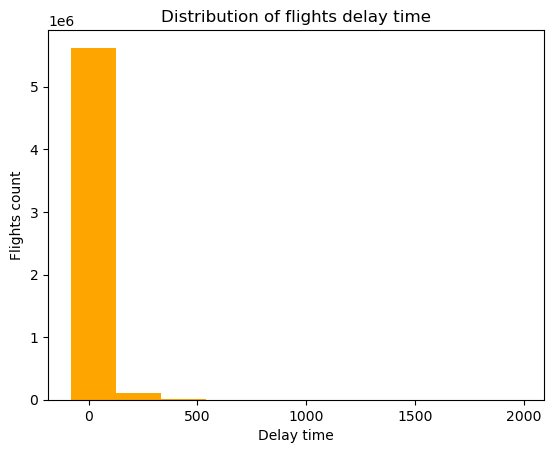

In [16]:
plt.hist(delay_flights['DEPARTURE_DELAY'], color = 'orange')
plt.title('Distribution of flights delay time')
plt.xlabel('Delay time')
plt.ylabel('Flights count')

The column for the histogram is extremely high around 0 in comparison to other columns that might not be visible in the plot, meaning that flights that depart on time accounted for a very large proportion.

<h1>Flights with long delays</h1>

Since most flights have minimal delay time, we will be more interested in those that were delayed for more than 4 hours (240 minutes).

In [17]:
high_delay_flights = delay_flights[delay_flights['DEPARTURE_DELAY'] > 240]
high_delay_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON
484,2015,1,1,4,EV,2522,N879AS,LAW,DFW,1900-01-01 06:15:00,...,6,15,Atlantic Southeast Airlines,Lawton-Fort Sill Regional Airport,34.56771,-98.41664,Dallas/Fort Worth International Airport,32.89595,-97.03720,NaN
860,2015,1,1,4,UA,1195,N57864,MCO,SFO,1900-01-01 07:00:00,...,7,0,United Air Lines Inc.,Orlando International Airport,28.42889,-81.31603,San Francisco International Airport,37.61900,-122.37484,NaN
1995,2015,1,1,4,OO,6458,N969SW,FAT,DEN,1900-01-01 08:27:00,...,8,27,Skywest Airlines Inc.,Fresno Yosemite International Airport,36.77619,-119.71814,Denver International Airport,39.85841,-104.66700,NaN
2022,2015,1,1,4,AA,395,N3MCAA,ORD,SJU,1900-01-01 08:30:00,...,8,30,American Airlines Inc.,Chicago O'Hare International Airport,41.97960,-87.90446,Luis Muñoz Marín International Airport,18.43942,-66.00183,NaN
3119,2015,1,1,4,UA,1590,N13750,ORD,DFW,1900-01-01 09:47:00,...,9,47,United Air Lines Inc.,Chicago O'Hare International Airport,41.97960,-87.90446,Dallas/Fort Worth International Airport,32.89595,-97.03720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816705,2015,12,31,4,DL,1584,N982DL,ROC,ATL,1900-01-01 17:38:00,...,17,38,Delta Air Lines Inc.,Greater Rochester International Airport,43.11887,-77.67238,Hartsfield-Jackson Atlanta International Airport,33.64044,-84.42694,NaN
5818386,2015,12,31,4,NK,407,N617NK,MCO,DFW,1900-01-01 20:28:00,...,20,28,Spirit Air Lines,Orlando International Airport,28.42889,-81.31603,Dallas/Fort Worth International Airport,32.89595,-97.03720,NaN
5818498,2015,12,31,4,UA,488,N597UA,LAX,EWR,1900-01-01 20:50:00,...,20,50,United Air Lines Inc.,Los Angeles International Airport,33.94254,-118.40807,Newark Liberty International Airport,40.69250,-74.16866,NaN
5818809,2015,12,31,4,AA,638,N205UW,OGG,PHX,1900-01-01 22:00:00,...,22,0,American Airlines Inc.,Kahului Airport,20.89865,-156.43046,Phoenix Sky Harbor International Airport,33.43417,-112.00806,NaN


<h1>Why are flights cancelled?</h1>

The following bar plot will show how many flights are cancelled according to the four provided reasons.

Text(0, 0.5, 'Reasons')

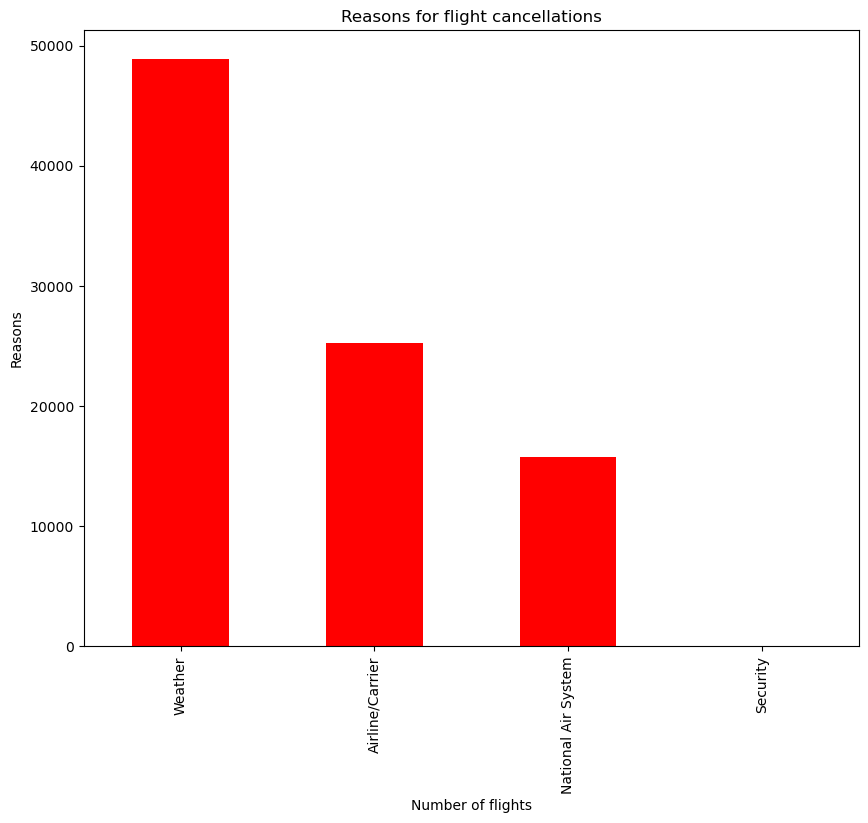

In [18]:
#visualizing reasons that flights are cancelled with a bar plot
series_cancel_reason = cancel_flights['CANCELLATION_REASON'].value_counts()
bar_cancel_reason = series_cancel_reason.plot.bar(figsize = (10, 8), color = 'red', title = 'Reasons for flight cancellations')
bar_cancel_reason.set_xlabel('Number of flights')
bar_cancel_reason.set_ylabel('Reasons')

It can be observed that bad weather accounted for a very proportion of flight cancellations with almost 50000 flights cancelled due to weather, while security isn't an issue that affects flights. For the other two reasons, the airline/carrier was more of a reason that flights are cancelled than the national air system.

<h1>Airlines performance analysis</h1>

We will now look at different aspects of airlines performance in the US in 2015.

<h2>Count number of flights by airlines</h2>

We will find out the number of flights according to airlines, and use a pie plot to visualize the total share in the number of flights.

In [19]:
#count number of flights by airlines
flights_count = flights.groupby('AIRLINE').size()
flights_count

AIRLINE
Alaska Airlines Inc.             172521
American Airlines Inc.           725984
American Eagle Airlines Inc.     294632
Atlantic Southeast Airlines      571977
Delta Air Lines Inc.             875881
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
JetBlue Airways                  267048
Skywest Airlines Inc.            588353
Southwest Airlines Co.          1261855
Spirit Air Lines                 117379
US Airways Inc.                  198715
United Air Lines Inc.            515723
Virgin America                    61903
dtype: int64

Text(0.5, 1.0, 'Proportion of flights according to airlines')

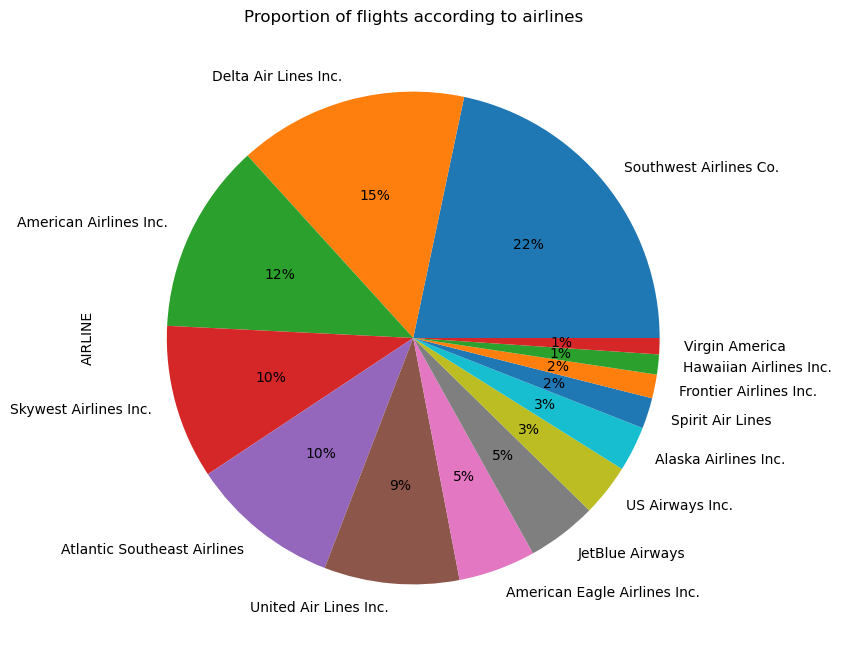

In [20]:
#plot the flights count share according to airlines using a pie plot
flights_count_pie_series = flights['AIRLINE'].value_counts()
flights_count_pie = flights_count_pie_series.plot.pie(figsize = (10, 8), autopct='%1.0f%%')
flights_count_pie.set_title('Proportion of flights according to airlines')

Southwest Airlines Co. is the main airline carrier in the US in 2015 with 22% of the flights, followed by Delta Airlines with 15% of the flights. On the other hand, Virgin America and Hawaiian Airlines flights accounted for the smallest proportions of 1% for each airline.

<h2>Distribution of delay times by airlines</h2>

We will observe the mean and quartiles of the departure delay time by airlines to compare the performance of the airlines in terms of departure delay time

In [21]:
#take the mean and quartiles departure delay times by airlines
departure_delay_avg_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].mean()
departure_delay_min_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].min()
departure_delay_q1_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].quantile(0.25)
departure_delay_med_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].median()
departure_delay_q3_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].quantile(0.75)
departure_delay_max_by_airlines = delay_flights.groupby('AIRLINE')[['DEPARTURE_DELAY']].max()
departure_delay_by_airlines = pd.concat([departure_delay_avg_by_airlines, departure_delay_min_by_airlines, departure_delay_q1_by_airlines, departure_delay_med_by_airlines, departure_delay_q3_by_airlines, departure_delay_max_by_airlines], axis = 1)
departure_delay_by_airlines.columns = (['MEAN', 'MIN', 'Q1', 'MEDIAN', 'Q3', 'MAX'])
departure_delay_by_airlines

,MEAN,MIN,Q1,MEDIAN,Q3,MAX
AIRLINE,,,,,,
Alaska Airlines Inc.,1.785801,-82.0,-8.0,-4.0,1.0,963.0
American Airlines Inc.,8.900856,-68.0,-5.0,-2.0,5.0,1988.0
American Eagle Airlines Inc.,10.125188,-36.0,-6.0,-2.0,8.0,1544.0
Atlantic Southeast Airlines,8.715934,-55.0,-6.0,-3.0,4.0,1274.0
Delta Air Lines Inc.,7.369254,-61.0,-4.0,-1.0,4.0,1289.0
Frontier Airlines Inc.,13.350858,-46.0,-7.0,-2.0,12.0,1112.0
Hawaiian Airlines Inc.,0.485713,-27.0,-7.0,-4.0,1.0,1433.0
JetBlue Airways,11.514353,-31.0,-5.0,-2.0,11.0,1006.0
Skywest Airlines Inc.,7.801104,-56.0,-6.0,-3.0,4.0,1378.0


From the table of the departure delay times, it can be seen that all airlines have minimal departure delays for most of their flights, with more 75% of their flights with departure delays of less than 20 minutes and the mean departure delays less than 20 minutes; although for most airlines more than half of their flights depart before expected. 

<h2>Long delay flights by airlines</h2>

We will now look at flights with long departure delay time, grouped by airlines.

In [22]:
#group highly delayed flights by airlines
high_delay_flights_airlines = high_delay_flights.groupby('AIRLINE').size()
high_delay_flights_airlines

AIRLINE
Alaska Airlines Inc.             295
American Airlines Inc.          2959
American Eagle Airlines Inc.    1183
Atlantic Southeast Airlines     2692
Delta Air Lines Inc.            3522
Frontier Airlines Inc.           810
Hawaiian Airlines Inc.            94
JetBlue Airways                 1113
Skywest Airlines Inc.           2213
Southwest Airlines Co.          2905
Spirit Air Lines                 631
US Airways Inc.                  430
United Air Lines Inc.           2996
Virgin America                   162
dtype: int64

In [23]:
#calculate the ratio of highly delayed flights to total number of flights for all airlines
high_delay_flights_airlines_ratio = high_delay_flights_airlines / flights_count
high_delay_flights_airlines_ratio

AIRLINE
Alaska Airlines Inc.            0.001710
American Airlines Inc.          0.004076
American Eagle Airlines Inc.    0.004015
Atlantic Southeast Airlines     0.004706
Delta Air Lines Inc.            0.004021
Frontier Airlines Inc.          0.008917
Hawaiian Airlines Inc.          0.001232
JetBlue Airways                 0.004168
Skywest Airlines Inc.           0.003761
Southwest Airlines Co.          0.002302
Spirit Air Lines                0.005376
US Airways Inc.                 0.002164
United Air Lines Inc.           0.005809
Virgin America                  0.002617
dtype: float64

<h2>Distribution of delay times for long delay flights by airlines</h2>

We will plot the delay times for flights by airlines for those that are delayed for more than 4 hours with box plots.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of departure delay time for highly delayed flights by airlines')

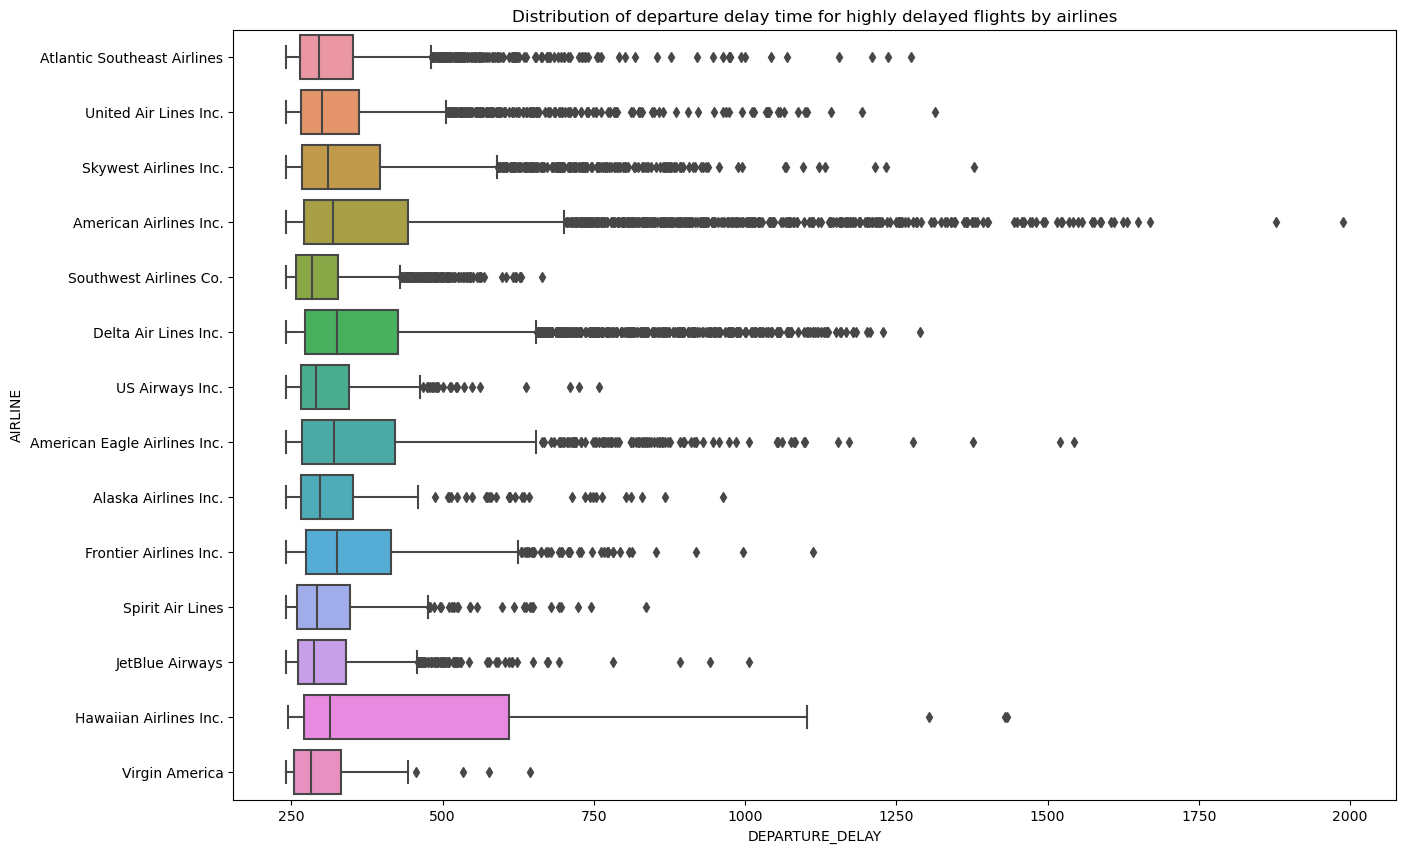

In [ ]:
#box plot of departure delay times by airlines (only for over 4 hours)
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot('DEPARTURE_DELAY', 'AIRLINE', data = high_delay_flights, ax = ax)
ax.set_title('Distribution of departure delay time for highly delayed flights by airlines')

When it comes to flights with delay time over 240 minutes, 75% or of the flights of all airlines were delayed in less than 500 minutes, with Hawaiian Airlines being an exception as the third quartile of their delay times was around 625 minutes (more than 10 hours). In addition, we can see that flights with highest delay times come from American Airlines, as shown from outliers above the 1500 minutes (25 hours) mark.

<h3>How were Hawaiian Airlines' departure delays distributed</h3>

With such weird distribution in departure delays in comparison to other airlines as seen in the box plot, we will use a histogram to plot the departure delays of Hawaiian Airlines flights (only for flights with more than 240-minute delays)

Text(0, 0.5, 'Flights count')

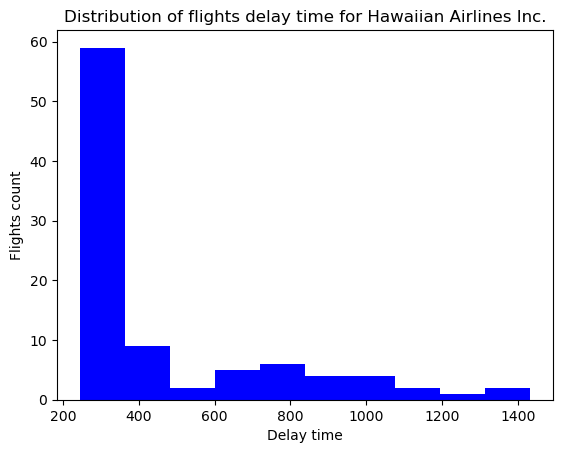

In [25]:
#histogram of delays for Hawaiian Airlines flights delayed for more than 240 minutes
plt.hist(high_delay_flights[high_delay_flights['AIRLINE'] == 'Hawaiian Airlines Inc.']['DEPARTURE_DELAY'], color = 'blue')
plt.title('Distribution of flights delay time for Hawaiian Airlines Inc.')
plt.xlabel('Delay time')
plt.ylabel('Flights count')

With the exception of the first two columns representing smaller delay times being higher, the rest of the columns are rather equally distributed, meaning that the delay time for Hawaiian Airlines varied rather equally between different equal time frames after around 450 minutes.

<h2>Cancellations due to airlines/carriers</h2>

We will look at flights that are cancelled because of airlines/carriers, which happened approximately 25000 times.

In [26]:
#filter flights cancelled due to airlines/carriers
cancel_flights_airlines = cancel_flights[cancel_flights['CANCELLATION_REASON_CODE'] == 'A']
cancel_flights_airlines

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_DEPARTURE_MINUTE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,1900-01-01 01:35:00,...,1,35,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,61.17432,-149.99619,Seattle-Tacoma International Airport,47.44898,-122.30931,Airline/Carrier
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,1900-01-01 05:30:00,...,5,30,Skywest Airlines Inc.,Redding Municipal Airport,40.50898,-122.29340,San Francisco International Airport,37.61900,-122.37484,Airline/Carrier
131,2015,1,1,4,OO,6457,N560SW,SMX,LAX,1900-01-01 05:45:00,...,5,45,Skywest Airlines Inc.,Santa Maria Public Airport (Capt G. Allan Hanc...,34.89925,-120.45758,Los Angeles International Airport,33.94254,-118.40807,Airline/Carrier
297,2015,1,1,4,F9,865,NaN,MSO,DEN,1900-01-01 06:00:00,...,6,0,Frontier Airlines Inc.,Missoula International Airport,46.91631,-114.09056,Denver International Airport,39.85841,-104.66700,Airline/Carrier
298,2015,1,1,4,F9,1256,NaN,ORD,MIA,1900-01-01 06:00:00,...,6,0,Frontier Airlines Inc.,Chicago O'Hare International Airport,41.97960,-87.90446,Miami International Airport,25.79325,-80.29056,Airline/Carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1900-01-01 19:55:00,...,19,55,United Air Lines Inc.,George Bush Intercontinental Airport,29.98047,-95.33972,Tampa International Airport,27.97547,-82.53325,Airline/Carrier
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,1900-01-01 20:00:00,...,20,0,United Air Lines Inc.,San Francisco International Airport,37.61900,-122.37484,Los Angeles International Airport,33.94254,-118.40807,Airline/Carrier
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,1900-01-01 20:19:00,...,20,19,American Airlines Inc.,Miami International Airport,25.79325,-80.29056,San Diego International Airport (Lindbergh Field),32.73356,-117.18966,Airline/Carrier
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,1900-01-01 21:55:00,...,21,55,Spirit Air Lines,Fort Lauderdale-Hollywood International Airport,26.07258,-80.15275,Niagara Falls International Airport,43.10726,-78.94538,Airline/Carrier


In [27]:
#count number of cancelled flights due to airlines/carriers according to airlines
cancel_flights_airlines_count = cancel_flights_airlines.groupby('AIRLINE').size()
cancel_flights_airlines_count

AIRLINE
Alaska Airlines Inc.             334
American Airlines Inc.          2879
American Eagle Airlines Inc.    2475
Atlantic Southeast Airlines     3604
Delta Air Lines Inc.             594
Frontier Airlines Inc.           308
Hawaiian Airlines Inc.           170
JetBlue Airways                  883
Skywest Airlines Inc.           3205
Southwest Airlines Co.          6122
Spirit Air Lines                 654
US Airways Inc.                 1007
United Air Lines Inc.           2870
Virgin America                   157
dtype: int64

In [28]:
#calculate the rate of cancellation by each airline
cancel_flights_airlines_ratio = cancel_flights_airlines_count / flights_count
cancel_flights_airlines_ratio

AIRLINE
Alaska Airlines Inc.            0.001936
American Airlines Inc.          0.003966
American Eagle Airlines Inc.    0.008400
Atlantic Southeast Airlines     0.006301
Delta Air Lines Inc.            0.000678
Frontier Airlines Inc.          0.003391
Hawaiian Airlines Inc.          0.002229
JetBlue Airways                 0.003307
Skywest Airlines Inc.           0.005447
Southwest Airlines Co.          0.004852
Spirit Air Lines                0.005572
US Airways Inc.                 0.005068
United Air Lines Inc.           0.005565
Virgin America                  0.002536
dtype: float64

<h2>Visualize airlines performance in terms of delays and cancellations</h2>

In [29]:
#merge the delay rates and cancel rates for each airline as calculated previously
airlines_performance = pd.concat([high_delay_flights_airlines_ratio, cancel_flights_airlines_ratio], axis=1)
airlines_performance.columns = ['DELAY_RATE', 'CANCEL_RATE']
airlines_performance

,DELAY_RATE,CANCEL_RATE
AIRLINE,,
Alaska Airlines Inc.,0.001710,0.001936
American Airlines Inc.,0.004076,0.003966
American Eagle Airlines Inc.,0.004015,0.008400
Atlantic Southeast Airlines,0.004706,0.006301
Delta Air Lines Inc.,0.004021,0.000678
Frontier Airlines Inc.,0.008917,0.003391
Hawaiian Airlines Inc.,0.001232,0.002229
JetBlue Airways,0.004168,0.003307
Skywest Airlines Inc.,0.003761,0.005447


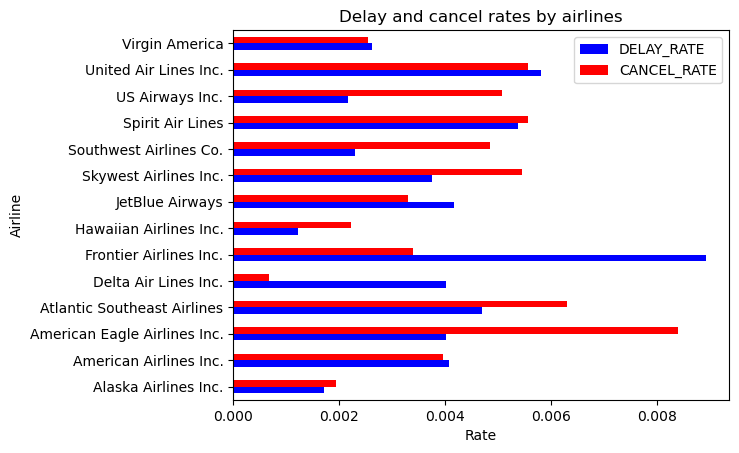

In [30]:
airlines_performance.plot(kind = 'barh', color = ['blue', 'red'])
plt.xlabel('Rate')
plt.ylabel('Airline')
plt.title('Delay and cancel rates by airlines')
plt.show()

All airlines delayed their flights for more than 4 hours or cancelled their flights due to internal reasons for less than 1% of their flights. It seems that Haiwaiian Airlines and Alaska Airlines had low rates for both delays and cancelations of around 0.2%. On the other hand, Frontier Airlines had a relatively high delay rate, while American Eagle Airlines' cancel rate was extremely high in comparison to other airlines.

<h1>Delays and cancellations by day</h1>

Now we will analyse the flights by the flights date, to see when in the year were there more delays or cancellations than other periods, using line plots of cumulative number of flights delayed or cancelled.

<h2>When are flights delayed for more than 4 hours?</h2>

In [31]:
#count number of delayed flights for each day
delay_by_date_flights_count = high_delay_flights.groupby('DATE').size()
delay_by_date_flights_count

DATE
2015-01-01     31
2015-01-02     37
2015-01-03     99
2015-01-04    163
2015-01-05    104
             ... 
2015-12-27    259
2015-12-28    279
2015-12-29    279
2015-12-30    139
2015-12-31     52
Length: 365, dtype: int64

In [32]:
#take the cumulative sum
delay_by_date_flights_cum = delay_by_date_flights_count.cumsum()
delay_by_date_flights_cum

DATE
2015-01-01       31
2015-01-02       68
2015-01-03      167
2015-01-04      330
2015-01-05      434
              ...  
2015-12-27    21256
2015-12-28    21535
2015-12-29    21814
2015-12-30    21953
2015-12-31    22005
Length: 365, dtype: int64

Text(0, 0.5, 'Number of delayed flights')

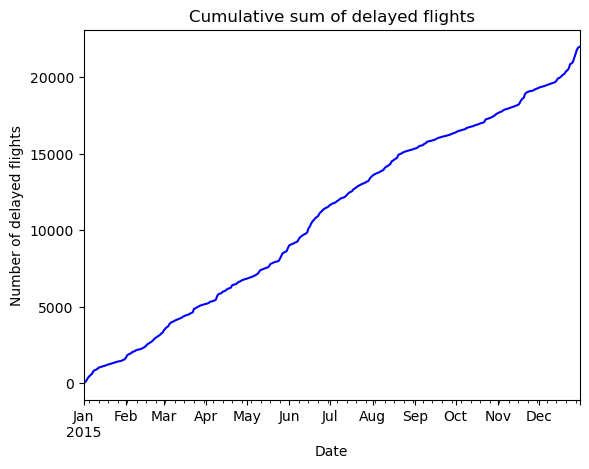

In [33]:
#plot the cumulative sum
delay_acc_plot = delay_by_date_flights_cum.plot(title = 'Cumulative sum of delayed flights', color = 'blue')
delay_acc_plot.set_xlabel('Date')
delay_acc_plot.set_ylabel('Number of delayed flights')

The rise in cumulative number of delayed flights was rather constant throughout the year, though a bit sharper at the end period of the year. This shows that the number of flights delayed for more than 4 hours per day stayed at rather constant throughout the whole year of 2015, although there are more at the ending days of December.

<h2>When are flights cancelled?</h2>

We will next observe when most flights are cancelled, using a line plot of the cumulative flights cancelled.

In [34]:
#count number of cancelled flights for each day
cancel_by_date_flights_count = cancel_flights[cancel_flights['CANCELLED'] == 1].groupby('DATE').size()
cancel_by_date_flights_count

DATE
2015-01-01     466
2015-01-02     257
2015-01-03     331
2015-01-04     433
2015-01-05     435
              ... 
2015-12-27    1158
2015-12-28    2177
2015-12-29     685
2015-12-30     281
2015-12-31      42
Length: 365, dtype: int64

In [35]:
#take the cumulative sum
cancel_by_date_flights_cum = cancel_by_date_flights_count.cumsum()
cancel_by_date_flights_cum

DATE
2015-01-01      466
2015-01-02      723
2015-01-03     1054
2015-01-04     1487
2015-01-05     1922
              ...  
2015-12-27    86699
2015-12-28    88876
2015-12-29    89561
2015-12-30    89842
2015-12-31    89884
Length: 365, dtype: int64

Text(0, 0.5, 'Number of cancelled flights')

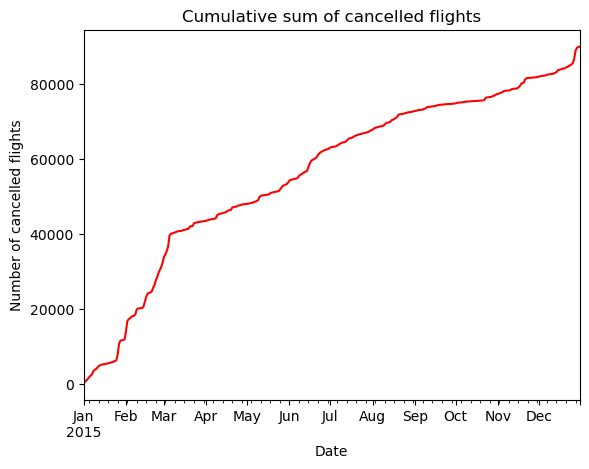

In [36]:
#plot the cumulative sum
cancel_acc_plot = cancel_by_date_flights_cum.plot(title = 'Cumulative sum of cancelled flights', color = 'red')
cancel_acc_plot.set_xlabel('Date')
cancel_acc_plot.set_ylabel('Number of cancelled flights')

From the line graph, it can be seen that most flights are cancelled during February, as shown in a steep rise during this period. While for the other months, the rise in cumulative number of flights cancelled was rather constant, although a bit slower during September and a bit faster by the end of December.

<h1>Delays and cancellations by time</h1>

What about the time of the day? We will do the same as what we did previously for the date using line plots.

In [37]:
#count number of delayed flights for each day
delay_by_time_flights_count = high_delay_flights.groupby('SCHEDULED_DEPARTURE').size()
delay_by_time_flights_count

SCHEDULED_DEPARTURE
1900-01-01 00:01:00    1
1900-01-01 00:08:00    1
1900-01-01 00:10:00    4
1900-01-01 00:15:00    4
1900-01-01 00:24:00    1
                      ..
1900-01-01 23:55:00    7
1900-01-01 23:56:00    1
1900-01-01 23:57:00    1
1900-01-01 23:58:00    2
1900-01-01 23:59:00    9
Length: 1084, dtype: int64

In [38]:
#take the cumulative sum
delay_by_time_flights_cum = delay_by_time_flights_count.cumsum()
delay_by_time_flights_cum

SCHEDULED_DEPARTURE
1900-01-01 00:01:00        1
1900-01-01 00:08:00        2
1900-01-01 00:10:00        6
1900-01-01 00:15:00       10
1900-01-01 00:24:00       11
                       ...  
1900-01-01 23:55:00    21992
1900-01-01 23:56:00    21993
1900-01-01 23:57:00    21994
1900-01-01 23:58:00    21996
1900-01-01 23:59:00    22005
Length: 1084, dtype: int64

Text(0, 0.5, 'Number of delayed flights')

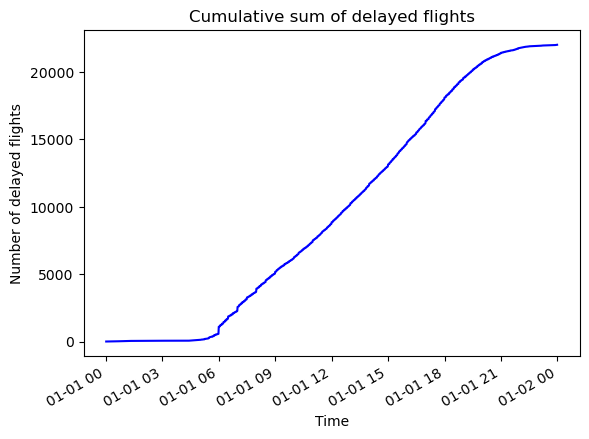

In [39]:
#plot the cumulative sum
delay_time_acc_plot = delay_by_time_flights_cum.plot(title = 'Cumulative sum of delayed flights', color = 'blue')
delay_time_acc_plot.set_xlabel('Time')
delay_time_acc_plot.set_ylabel('Number of delayed flights')

It can be seen that night flights were rarely delayed for over 240 minutes, as shown by rather horizontal partitions on the graph. While during daytime, the constant rise in cumulative number of delayed flights that the number of highly delayed flights for this period was rather constant for equal partitions of time.

In [40]:
#count number of cancelled flights for each time
cancel_by_time_flights_count = cancel_flights[cancel_flights['CANCELLED'] == 1].groupby('SCHEDULED_DEPARTURE').size()
cancel_by_time_flights_count

SCHEDULED_DEPARTURE
1900-01-01 00:01:00     1
1900-01-01 00:05:00     4
1900-01-01 00:07:00     1
1900-01-01 00:08:00     2
1900-01-01 00:10:00     3
                       ..
1900-01-01 23:55:00    39
1900-01-01 23:56:00     7
1900-01-01 23:57:00     3
1900-01-01 23:58:00     5
1900-01-01 23:59:00    42
Length: 1203, dtype: int64

In [41]:
#take the cumulative sum
cancel_by_time_flights_cum = cancel_by_time_flights_count.cumsum()
cancel_by_time_flights_cum

SCHEDULED_DEPARTURE
1900-01-01 00:01:00        1
1900-01-01 00:05:00        5
1900-01-01 00:07:00        6
1900-01-01 00:08:00        8
1900-01-01 00:10:00       11
                       ...  
1900-01-01 23:55:00    89827
1900-01-01 23:56:00    89834
1900-01-01 23:57:00    89837
1900-01-01 23:58:00    89842
1900-01-01 23:59:00    89884
Length: 1203, dtype: int64

Text(0, 0.5, 'Number of cancelled flights')

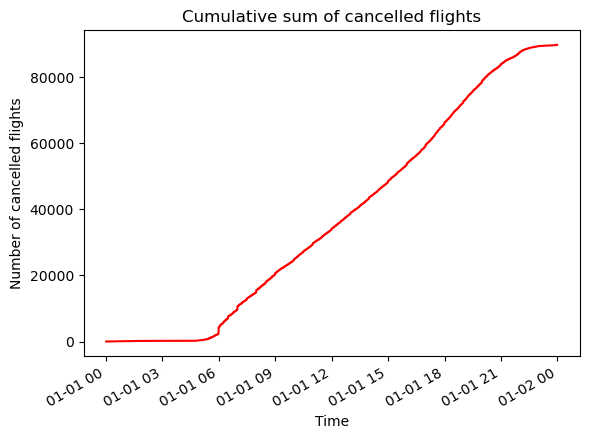

In [42]:
#plot the cumulative sum
cancel_time_acc_plot = cancel_by_time_flights_cum.plot(title = 'Cumulative sum of cancelled flights', color = 'red')
cancel_time_acc_plot.set_xlabel('Time')
cancel_time_acc_plot.set_ylabel('Number of cancelled flights')

It can be seen that very few flights were cancelled from midnight to 6am, while the number of flights cancelled during other periods stayed rather constant during the day, although the rate of cancellation became a bit slower by the end of the day.

<h1>Is there any correlations between delayed time and other factors?</h1>

We will observe the correlations between departure delays and some other numerical factors provided. We will be using heat map to show the correlation between variables when considering all flights that took place and pair plots when considering flights with long delays.

Firstly, we will need to convert the date into the number of days since 1/1/2015, and the departure time to the number of minutes since 12am each day.

In [43]:
#convert date
delay_flights['DAY_COUNT'] = (delay_flights['DATE'] - pd.Timestamp('2015-01-01')).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18104\2705469840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_flights['DAY_COUNT'] = (delay_flights['DATE'] - pd.Timestamp('2015-01-01')).dt.days


In [44]:
#convert scheduled departure time
delay_flights['DEPARTURE_MINUTE_COUNT'] = delay_flights['SCHEDULED_DEPARTURE'].dt.hour * 60 + delay_flights['SCHEDULED_DEPARTURE'].dt.minute

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18104\3037363206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_flights['DEPARTURE_MINUTE_COUNT'] = delay_flights['SCHEDULED_DEPARTURE'].dt.hour * 60 + delay_flights['SCHEDULED_DEPARTURE'].dt.minute


In [45]:
#review dataset
delay_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON,DAY_COUNT,DEPARTURE_MINUTE_COUNT
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,1900-01-01 00:05:00,...,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,61.17432,-149.99619,Seattle-Tacoma International Airport,47.44898,-122.30931,NaN,0,5
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,1900-01-01 00:10:00,...,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Palm Beach International Airport,26.68316,-80.09559,NaN,0,10
2,2015,1,1,4,US,840,N171US,SFO,CLT,1900-01-01 00:20:00,...,US Airways Inc.,San Francisco International Airport,37.61900,-122.37484,Charlotte Douglas International Airport,35.21401,-80.94313,NaN,0,20
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,1900-01-01 00:20:00,...,American Airlines Inc.,Los Angeles International Airport,33.94254,-118.40807,Miami International Airport,25.79325,-80.29056,NaN,0,20
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,1900-01-01 00:25:00,...,Alaska Airlines Inc.,Seattle-Tacoma International Airport,47.44898,-122.30931,Ted Stevens Anchorage International Airport,61.17432,-149.99619,NaN,0,25


In [46]:
#create entries to make scatterplots with
entries = ['DAY_COUNT', 'DEPARTURE_MINUTE_COUNT', 'DAY_OF_WEEK', 'DISTANCE', 'ORIGIN_AIRPORT_LATITUDE', 'ORIGIN_AIRPORT_LONGITUDE', 'DESTINATION_AIRPORT_LATITUDE', 'DESTINATION_AIRPORT_LONGITUDE', 'DEPARTURE_DELAY']
len(entries)

9

In [47]:
#calculate correlation matrix between variables
corr = spearmanr(delay_flights[entries].dropna()).correlation
corr

array([[ 1.00000000e+00,  1.38745022e-04, -1.45794366e-02,
         1.09195554e-02,  1.84670843e-02, -1.93490556e-03,
         1.83570612e-02, -2.04230102e-03, -2.07194302e-02],
       [ 1.38745022e-04,  1.00000000e+00,  8.18169738e-03,
        -2.79847962e-02, -4.05830922e-02, -2.96247945e-03,
         3.57358150e-02, -1.92122574e-02,  1.85887109e-01],
       [-1.45794366e-02,  8.18169738e-03,  1.00000000e+00,
         1.64984832e-02, -8.83514954e-03, -3.40793641e-03,
        -9.13237293e-03, -3.57827490e-03, -8.87380401e-03],
       [ 1.09195554e-02, -2.79847962e-02,  1.64984832e-02,
         1.00000000e+00, -1.13068572e-02,  1.04328210e-02,
        -1.12736851e-02,  1.02654179e-02,  9.02676038e-02],
       [ 1.84670843e-02, -4.05830922e-02, -8.83514954e-03,
        -1.13068572e-02,  1.00000000e+00,  7.55142774e-02,
         2.15663366e-01, -1.80116664e-02, -2.62901302e-02],
       [-1.93490556e-03, -2.96247945e-03, -3.40793641e-03,
         1.04328210e-02,  7.55142774e-02,  1.000000

<AxesSubplot:>

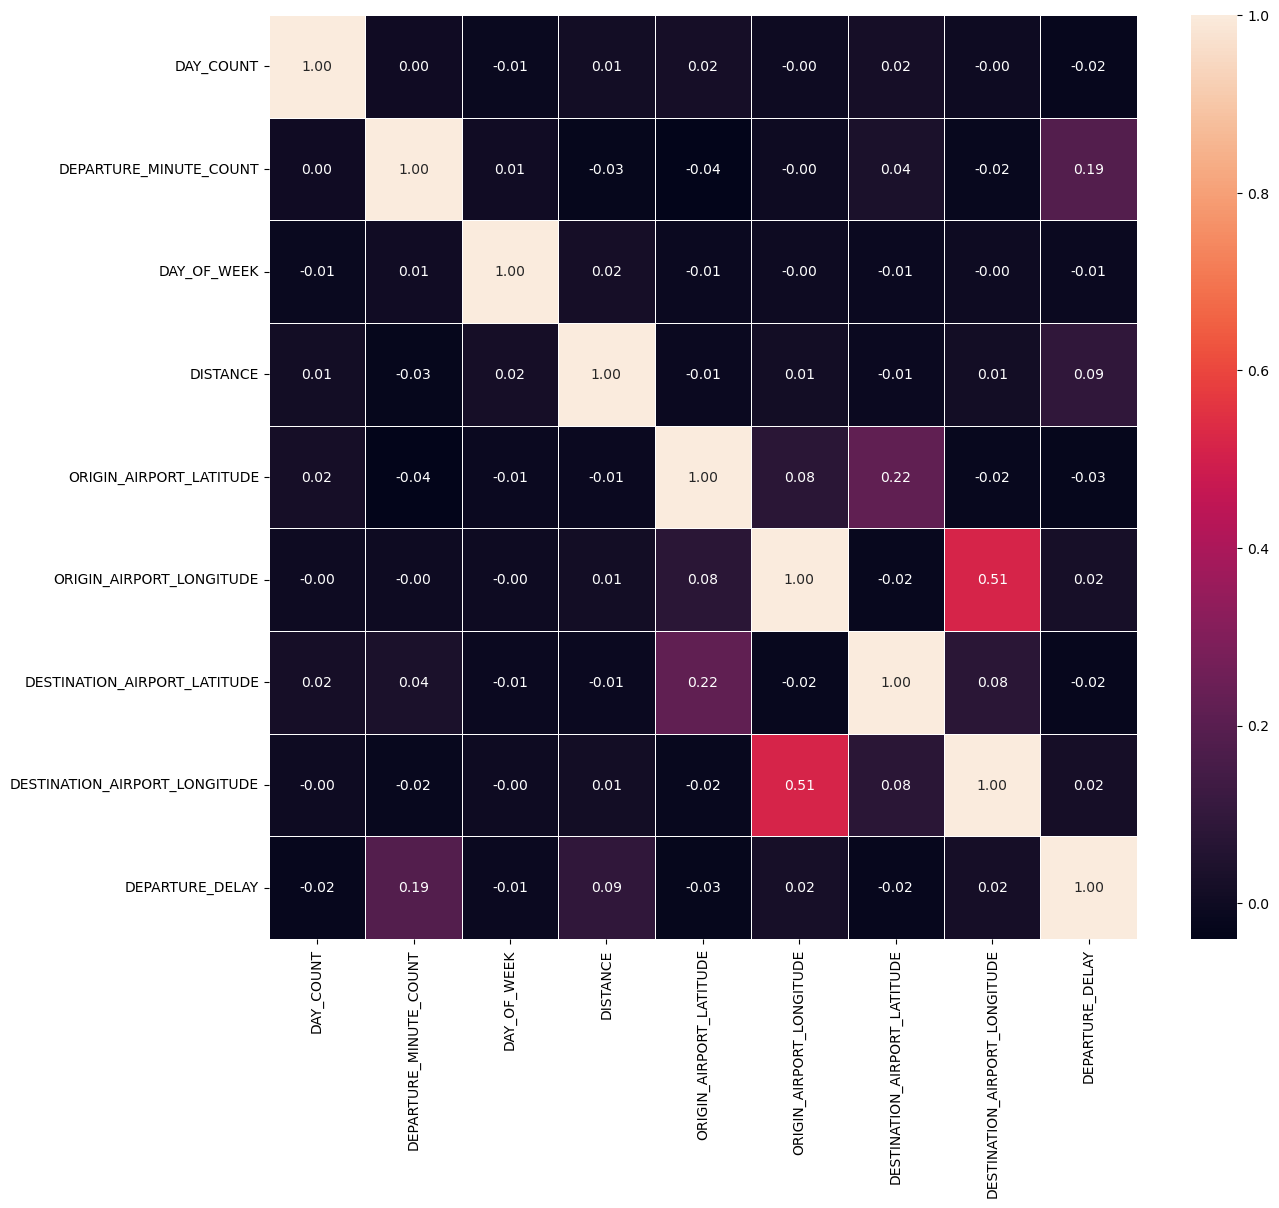

In [48]:
#plot heatmap of correlation coefficients
plt.figure(figsize=(14,12)) 
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, xticklabels=entries, yticklabels=entries)

It can be seen that the departure delay doesn't have any correlations against other variables filtered, with the exception of very minimal correlation against departure time (as shown in the correlation coefficient of 0.19)

In [49]:
high_delay_flights = delay_flights[delay_flights['DEPARTURE_DELAY'] > 240]
high_delay_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE_AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,IATA_CODE_ORIGIN_AIRPORT,IATA_CODE_DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIRLINE,ORIGIN_AIRPORT,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE,CANCELLATION_REASON,DAY_COUNT,DEPARTURE_MINUTE_COUNT
484,2015,1,1,4,EV,2522,N879AS,LAW,DFW,1900-01-01 06:15:00,...,Atlantic Southeast Airlines,Lawton-Fort Sill Regional Airport,34.56771,-98.41664,Dallas/Fort Worth International Airport,32.89595,-97.03720,NaN,0,375
860,2015,1,1,4,UA,1195,N57864,MCO,SFO,1900-01-01 07:00:00,...,United Air Lines Inc.,Orlando International Airport,28.42889,-81.31603,San Francisco International Airport,37.61900,-122.37484,NaN,0,420
1995,2015,1,1,4,OO,6458,N969SW,FAT,DEN,1900-01-01 08:27:00,...,Skywest Airlines Inc.,Fresno Yosemite International Airport,36.77619,-119.71814,Denver International Airport,39.85841,-104.66700,NaN,0,507
2022,2015,1,1,4,AA,395,N3MCAA,ORD,SJU,1900-01-01 08:30:00,...,American Airlines Inc.,Chicago O'Hare International Airport,41.97960,-87.90446,Luis Muñoz Marín International Airport,18.43942,-66.00183,NaN,0,510
3119,2015,1,1,4,UA,1590,N13750,ORD,DFW,1900-01-01 09:47:00,...,United Air Lines Inc.,Chicago O'Hare International Airport,41.97960,-87.90446,Dallas/Fort Worth International Airport,32.89595,-97.03720,NaN,0,587


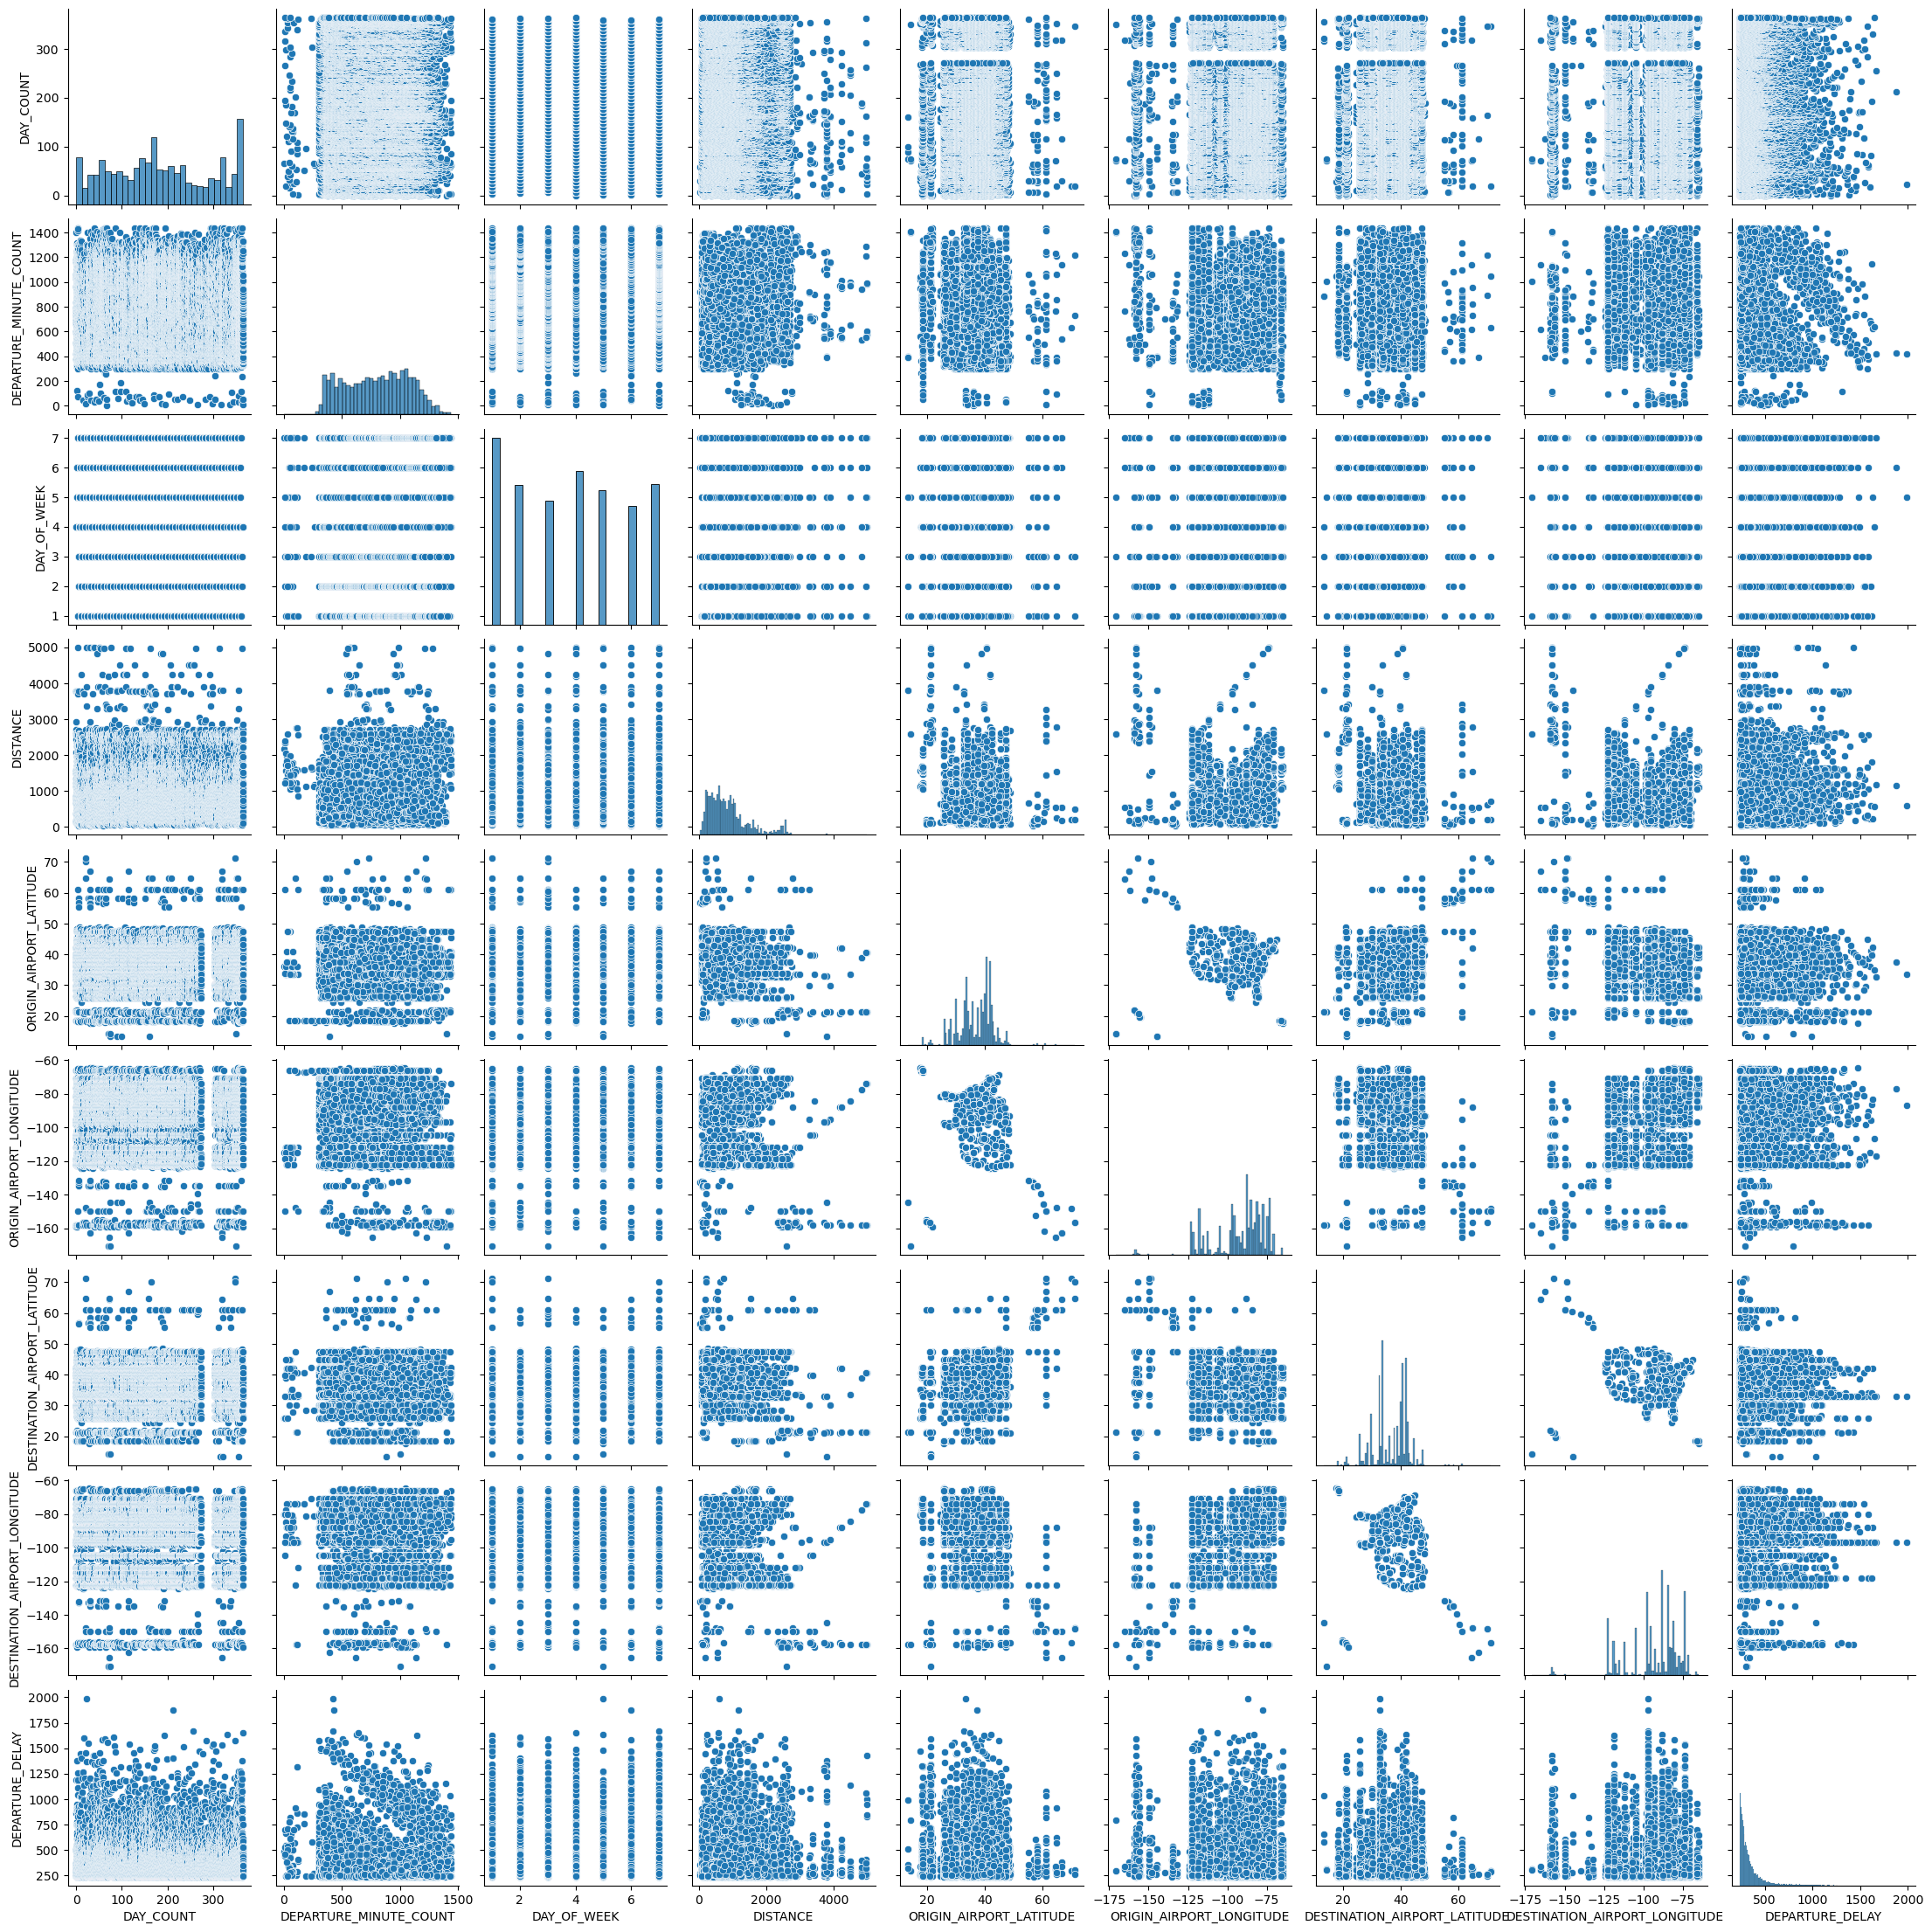

In [50]:
sns.pairplot(high_delay_flights[entries])

There don't seem to be much improvement in terms of correlations if we only select the departure delay time over 240 minutes as the scatters are rather random. The only variable that seems a bit correlated, again, is the departure time.